Usage example of MediaPipe Pose Solution API in Python (see also http://solutions.mediapipe.dev/pose).

In [1]:
!pip install mediapipe

Upload any image that that has a person. We take two example images from the web: https://unsplash.com/photos/v4zceVZ5HK8 and https://unsplash.com/photos/e_rhazQLaSs.


In [10]:
from google.colab import files
uploaded = files.upload()

Saving simple_front_view.mp4 to simple_front_view.mp4


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np

All MediaPipe Solutions Python API examples are under mp.solutions.

For the MediaPipe Pose solution, we can access this module as `mp_pose = mp.solutions.pose`.

You may change the parameters, such as `static_image_mode` and `min_detection_confidence`, during the initialization. Run `help(mp_pose.Pose)` to get more informations about the parameters.

In [11]:
import mediapipe as mp
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles


In [30]:
# Run MediaPipe Pose and draw pose landmarks.
def get_key_landmarks(frame):
  with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
    # results = pose.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    try:
      results = pose.process(frame)
      left_shoulder = (results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].x, results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].y, results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].z)
      right_shoulder = (results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].x, results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].y, results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].z)
      right_hip = (results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].x, results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].y, results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].z)
      left_hip = (results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP].x, results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP].y, results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP].z)
      right_heel = (results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].x, results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].y, results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].z)
      left_heel = (results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HEEL].x, results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HEEL].y, results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HEEL].z)
      right_feet = (results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].x, results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].y, results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].z)
      left_feet = (results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].x, results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].y, results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].z)
      left_elbow = (results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].x, results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].y, results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].z)
      right_elbow = (results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW].x, results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW].y, results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW].z)
      left_wrist = (results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST].x, results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST].y, results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST].z)
      right_wrist = (results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].x, results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].y, results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].z)
      left_knee = (results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].x, results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].y, results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].z)
      right_knee = (results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].x, results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].y, results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].z)
      return {'l_shoulder':left_shoulder, 'r_shoulder': right_shoulder, 'l_hip': left_hip, 'r_hip': right_hip, 'l_heel': left_heel, 
          'r_heel': right_heel, 'r_foot': right_feet, 'l_foot': left_feet, 'l_elbow' : left_elbow, 
          'r_elbow' : right_elbow, 'l_wrist' : left_wrist, 'r_wrist' : right_wrist, 'l_knee' : left_knee, 'r_knee' : right_knee}
    except:
      return -1
  

In [ ]:
get_key_landmarks(images['good_pushup.jpg'])

## Pushups

In [37]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [61]:
cap = cv2.VideoCapture("simple_front_view.mp4")

imgs, frames = [], []
count = 0
total_frames = 0
if cap.isOpened():
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    res=(int(width), int(height))

    frame = None
    while True:
        total_frames += 1
        try:
            is_success, frame = cap.read()
        except cv2.error:
            continue
        
        clear_output(wait=True)
        if not is_success:
            break

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        lnd = get_key_landmarks(image)
        if lnd != -1:
          imgs.append(image)
          frames.append(lnd)
        #plt.imshow(image); plt.show()
        count += 15
        cap.set(cv2.CAP_PROP_POS_FRAMES, count)

print(frames)
cap.release()

[{'l_shoulder': (0.5561482906341553, 0.18831706047058105, -0.5595846176147461), 'r_shoulder': (0.3465796709060669, 0.1828218400478363, -0.5149514675140381), 'l_hip': (0.49107903242111206, 0.40217870473861694, -0.01341333705931902), 'r_hip': (0.40583714842796326, 0.40107062458992004, 0.013121654279530048), 'l_heel': (0.46515050530433655, 0.5317404866218567, 0.8213077783584595), 'r_heel': (0.42733779549598694, 0.5150567889213562, 0.854139506816864), 'r_foot': (0.42807537317276, 0.6177269220352173, 0.7720617651939392), 'l_foot': (0.4589206576347351, 0.6195858716964722, 0.7285982370376587), 'l_elbow': (0.601478099822998, 0.49055755138397217, -0.5704198479652405), 'r_elbow': (0.3119257986545563, 0.49045902490615845, -0.524203360080719), 'l_wrist': (0.637367844581604, 0.773436963558197, -0.6178345084190369), 'r_wrist': (0.2857613265514374, 0.7792490720748901, -0.6040486693382263), 'l_knee': (0.47678717970848083, 0.5273000597953796, 0.36823007464408875), 'r_knee': (0.4118902087211609, 0.51615

In [62]:
len(frames)

11

In [82]:
DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image, title=None):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.title(title)
  plt.axis(False)
  plt.imshow(img); plt.show()

def show_marks(image, title=None):
  # Run MediaPipe Pose and draw pose landmarks.
  with mp_pose.Pose(
      static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
    # Convert the BGR image to RGB and process it with MediaPipe Pose.
    # results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    results = pose.process(image)
    # Print nose landmark.
    image_hight, image_width, _ = image.shape

    # Draw pose landmarks.
    annotated_image = image.copy()
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    resize_and_show(annotated_image, title=title)

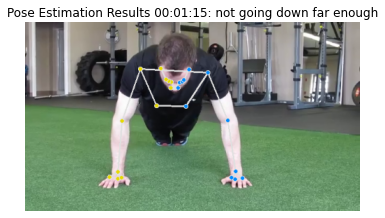

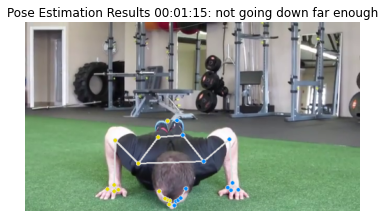

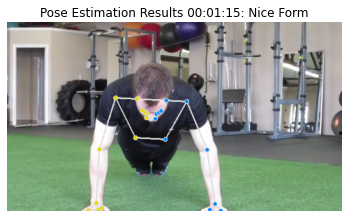

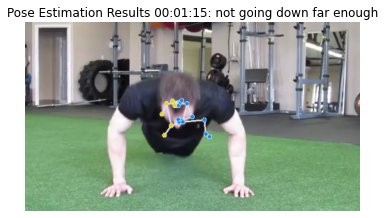

In [83]:
topFrame, topIdx = frames[0], 0
switchFrame, switchIdx = [], []
for i, frame in enumerate(frames):
  # plt.title(f'Left Shoulder z: {frames[i]["l_shoulder"][2]}')
  # plt.imshow(imgs[i]); plt.show()
  if i == 0 or i == len(frames)-1: continue
  
  if ((frames[i]['l_shoulder'][2]+0.01) - (frames[i-1]['l_shoulder'][2]))*((frames[i]['l_shoulder'][2]+0.01) - (frames[i+1]['l_shoulder'][2])) > 0:
    switchFrame.append(frames[i])
    switchIdx.append(i)

for i, frame in enumerate(switchFrame):
  message = ""
  if abs(frames[switchIdx[i]]['l_shoulder'][2]) > abs(frames[switchIdx[i]]['l_elbow'][2]) or abs(frames[switchIdx[i]]['r_shoulder'][2]) > abs(frames[switchIdx[i]]['r_elbow'][2]):
    message = 'not going down far enough'
  else:
    message = 'Nice Form'
  show_marks(imgs[switchIdx[i]], title=f'Pose Estimation Results 00:01:15: {message}')